# CNN Image Classification Laboration


Images used in this laboration are from [CIFAR10](https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. 

Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

Complete the code flagged throughout the elaboration and **answer all the questions in the notebook**.

In [3]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

# Part 1: Convolutions

In the next sections you will familiarize yourself with 2D convolutions.

## 1.1 What is a convolution?

To understand a bit more about convolutions, we will first test the convolution function in `scipy` using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function `convolve2d` in `signal` from scipy (see the [documentation](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.signal.convolve2d.html
) for more details).


In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

Run the cell below to define a Gaussian filter and a Sobel X and Y filters.

In [4]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import datasets
image = datasets.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [5]:
# --------------------------------------------
# === Your code here =========================
# -------------------------------------------- 
# Perform convolution using the function 'convolve2d' for the different filters

filterResponseGauss = signal.convolve2d(image, gaussFilter, mode = "same")
filterResponseSobelX = signal.convolve2d(image, sobelX, mode = "same")
filterResponseSobelY = signal.convolve2d(image, sobelY, mode = "same")

# ============================================

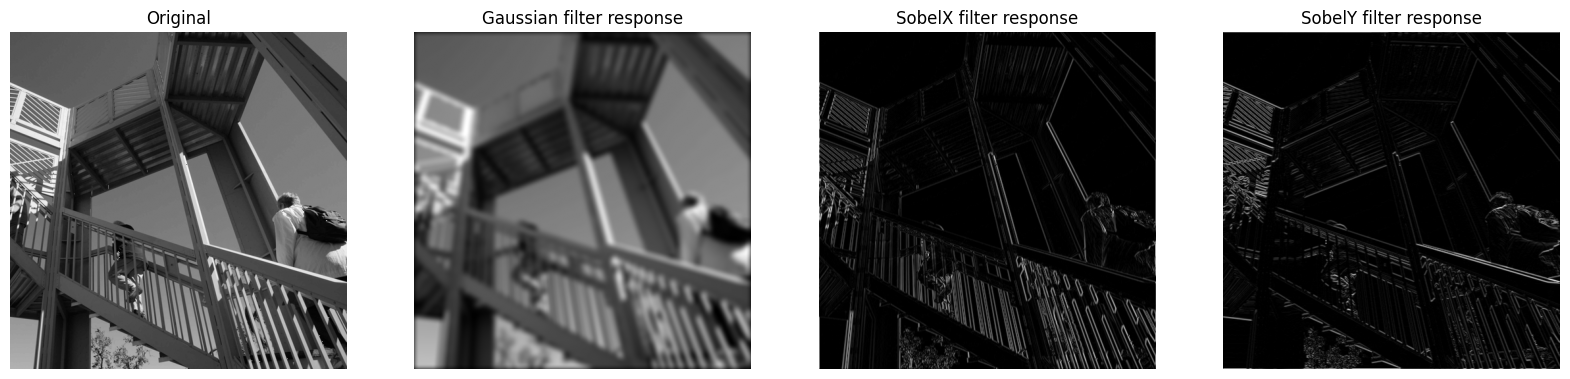

In [6]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Gaussian filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('SobelX filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('SobelY filter response')
ax_filt3.set_axis_off()

## 1.2 Understanding convolutions

#### **<span style="color:red">Questions</span>**

1. What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

2. What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

3. What is the size of the different filters?

4. What is the size of the filter response if mode 'same' is used for the convolution ?

5. What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

6. Why are 'valid' convolutions a problem for CNNs with many layers?

#### **<span style="color:green">Answers</span>**
1.Gaussian: blur the image,often used in preprocessing steps to reduce high-frequency noise.\
 SobelX:extract horizontal edge features for further analysis.\
 SobelY:extract vertical edge features for further analysis.\
2.The size of the original image:(512*512) 512 pixels wide and 512 pixels high.\
Channel of the original image: one channel ,grayscale.\
Channels in a color image: 3,Red,Green,Blue.\
3.Gaussian:(15*15), SobelX(3*3),SobelY(3*3)\
4.The size of the filter response would be the same with the original image:(512*512).\
5.The size of the valid filter response depends on the size of the filter and the original image(smaller than the original image).If the original image has dimensions (H, W) and the filter has dimensions (Fh, Fw), the size of the valid filter response will be:OutputHeight=H-Fh+1,OutputHeight=W-Fw+1.\
6.It reduces the size of the output feature map.With many layers,this continuous reduction can lead to very small feature maps,which may not be useful for further processing.\


In [7]:
# --------------------------------------------
# === Your code here =========================
# -------------------------------------------- 
# Your code for checking sizes of image and filter responses

print(image.shape)
print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)
# ============================================

(512, 512)
(512, 512)
(512, 512)
(512, 512)


#  Part 2: Get a graphics card

Skip the next cell if you run on the CPU.

If your computer has a dedicated graphics card and you would like to use it, we need to make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [8]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
    print("Running on GPU")
else:
    print('No GPU available.')

No GPU available.


## How fast is the graphics card?


#### **<span style="color:red">Questions</span>**

7. Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

8. What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

9.  Pretend that everyone is using an Nvidia RTX 3090 graphics card, how many CUDA cores does it have? How much memory does the graphics card have?

10. How much memory does the graphics card have?

11. What is stored in the GPU memory while training a CNN?

12. Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.


#### **<span style="color:green">Answers</span>**
7. Because of the depth/channel dimension in CNNs, color images have 3 channels (RGB). When applying a convolutional filter, it must cover the entire depth of the input image to extract meaningful features across all color channels. If the filter were just 7×7 (without depth), it wouldn’t consider the RGB structure.\
8. Conv2D is a deep learning layer that performs 2D convolutions while handling multiple channels, filters, padding, and trainable weights. On the other hand, signal.convolve2d is a basic mathematical function that performs a single 2D convolution without learning filters.\
9. CUDA Cores: 10496,Memory (VRAM): 24 GB GDDR6X\
10. Memory (VRAM): 24 GB GDDR6X\
11.  Model parameters (weights and biases of the CNN layers).
    - Feature maps (intermediate activations of the network).
    - Gradients (computed during backpropagation).
    - Optimizer state
    - Training batch data
    - Computation graph
12. No, a GPU is much faster when processing a large batch of images but does not gain the same efficiency for very small batches.
    - GPUs are optimized for parallel processing, meaning they work best when there is a large workload to distribute across thousands of CUDA cores.
    - When processing 1,000 images, the GPU can utilize its cores efficiently, leading to significant speedups over a CPU. When processing only 3 images, the GPU cannot fully utilize its parallel architecture, so the performance gain over a CPU is reduced.





# Part 3: Dataset

In the following section you will load the CIFAR10 dataset, check few samples, perform some preprocessing on the images and the labels, and split the data into training, validation and testing.

## 3.1 Load the dataset

Run the following section to load the CIFAR10 data, take a total of 10.000 training/validation samples and 2000 testing samples. 

In [9]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(X, Y), (Xtest, Ytest) = cifar10.load_data()

print("Training/validation images have size {} and labels have size {} ".format(X.shape, Y.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training/validation and testing to 10000 and 2000 respectively, 
# to reduce processing time for this elaboration. 
X = X[0:10000]
Y = Y[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training/validation images have size %s and labels have size %s " % (X.shape, Y.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training/validation examples for class {} is {}" .format(i,np.sum(Y == i)))

Training/validation images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training/validation images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training/validation examples for class 0 is 1005
Number of training/validation examples for class 1 is 974
Number of training/validation examples for class 2 is 1032
Number of training/validation examples for class 3 is 1016
Number of training/validation examples for class 4 is 999
Number of training/validation examples for class 5 is 937
Number of training/validation examples for class 6 is 1030
Number of training/validation examples for class 7 is 1001
Number of training/validation examples for class 8 is 1025
Number of training/validation examples for class 9 is 981


Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

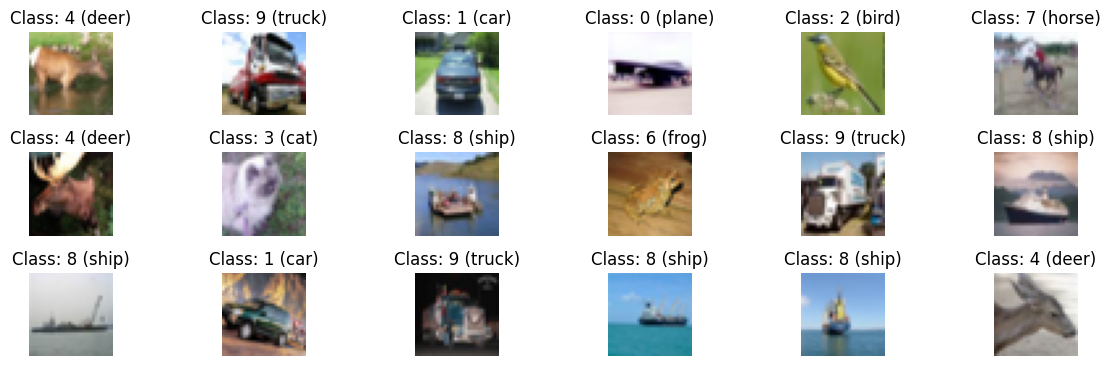

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Y[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##  3.2 Split data into training, validation and testing
Split your data (X, Y) into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration).

We use the `train_test_split` function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details) to obtain 25% validation set.

In [11]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# split the original dataset into 70% Training and 30% Temp
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.3, random_state=42)
# Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=42)


# Print the size of training data, validation data and test data
print(f'The training set has size {Xtrain.shape[0]}')
print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

# ============================================

The training set has size 7000
The validation set has size 3000
The test set has size 2000


## 3.3 Image Preprocessing

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255.

In [12]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  3.4 Label preprocessing

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use the `to_categorical`function in Keras (see the [documentation](https://keras.io/api/utils/python_utils/#to_categorical-function) for details on how to use it)

In [13]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))


# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your code for converting Ytrain, Yval, Ytest to categorical#
Ytrain = to_categorical(Ytrain, num_classes=10)
Yval = to_categorical(Yval, num_classes=10)
Ytest = to_categorical(Ytest, num_classes=10)

# Print shapes after converting the labels
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))

# ============================================

Ytrain has size (7000, 1).
Yval has size (3000, 1).
Ytest has size (2000, 1).
Ytrain has size (7000, 10).
Yval has size (3000, 10).
Ytest has size (2000, 10).


# Part 4: 2D CNN

In the following sections you will build a 2D CNN model and will train it to perform classification on the CIFAR10 dataset. 

## 4.1 Build CNN model

Start by implementing the `build_CNN` function in the `utilities.py` file. Below you can find the specifications on how your `build_CNN` function should build the model:
- Each convolutional layer is composed by: `2D convolution` -> `batch normalization` -> `max pooling`.
- The `2D convolution` uses a 3 x 3 kernel size, padding='same' and a number of starting filter that is an input to the `build_CNN` function. The number of filters doubles with each convolutional layer (e.g. 32, 64, 128, etc.)
- The max pooling layers should have a pool size of 2 x 2.
- After the convolutional layers comes a flatten layer, followed by a number of intermediate dense layers. 
- The number of nodes in the intermediate dense layers before the final dense layer is an input to the `build_CNN` function. The intermediate dense layers use `relu` activation functions and each is followed by `batch normalization`.
- The final dense layer should have 10 nodes (=the number of classes in this elaboration) and `softmax` activation. 

Here are some relevant functions that you should use in `build_CNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function. 
- `Conv2D()` performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3) (see [documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)). 
- `BatchNormalization()`, perform batch normalization (see [documentation](https://keras.io/api/layers/normalization_layers/batch_normalization/)).
- `MaxPooling2D()`, saves the max for a given pool size, results in down sampling (see [documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/)).
- `Flatten()`, flatten a multi-channel tensor into a long vector (see [documentation](https://keras.io/api/layers/reshaping_layers/flatten/)).
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

Here you can start with the `Adam` optimizer when compiling the model.

Use the following cell to test your `build_CNN` utility function. Remember to import a relevant cost function for multi-class classification from [keras.losses](https://keras.io/losses/) which relates to how many classes you have.

In [14]:
# import utilities
from utilities import build_CNN

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# import a suitable loss function from keras.losses and use as input to the build_DNN function.
from tf_keras.losses import CategoricalCrossentropy as CCE

# Build a DNN model following the specifications above
model = build_CNN(input_shape = (Xtrain.shape[1:]), loss = CCE(),  
                optimizer='adam')

# ============================================

## 4.2 Train 2D CNN

Time to train the CNN!

Start with a model with 2 convolutional layers where the first layer has have 16 filters, and with no intermediate dense layers.

Set the training parameters, build the model and run the training. 

Use the following training parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.01`

Relevant functions:
- `build_CNN`, the function that you defined in the `utilities.py` file.
- `model.fit()`, train the model with some training data (see [documentation](https://keras.io/api/models/model_training_apis/#fit-method)).
- `model.evaluate()`, apply the trained model to some test data (see [documentation](https://keras.io/api/models/model_training_apis/#evaluate-method)).

## 2 convolutional layers, no intermediate dense layers

In [15]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = Xtrain.shape[1:]  #ignore the first dimension
learning_rate = 0.01

# Build model
model1 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, Yval))

# ============================================

Epoch 1/20


350/350 [==============================] - 2s 4ms/step - loss: 2.4010 - accuracy: 0.3431 - val_loss: 1.9864 - val_accuracy: 0.2867
Epoch 2/20
350/350 [==============================] - 1s 3ms/step - loss: 1.4997 - accuracy: 0.4607 - val_loss: 1.5492 - val_accuracy: 0.4513
Epoch 3/20
350/350 [==============================] - 1s 4ms/step - loss: 1.3527 - accuracy: 0.5243 - val_loss: 1.4884 - val_accuracy: 0.4913
Epoch 4/20
350/350 [==============================] - 1s 4ms/step - loss: 1.2472 - accuracy: 0.5596 - val_loss: 1.5236 - val_accuracy: 0.4903
Epoch 5/20
350/350 [==============================] - 1s 4ms/step - loss: 1.1548 - accuracy: 0.5983 - val_loss: 1.4237 - val_accuracy: 0.5130
Epoch 6/20
350/350 [==============================] - 1s 4ms/step - loss: 1.0797 - accuracy: 0.6227 - val_loss: 1.4475 - val_accuracy: 0.5297
Epoch 7/20
350/350 [==============================] - 1s 4ms/step - loss: 0.9860 - accuracy: 0.6624 - val_loss: 1.4255 - val_accuracy: 0.5353
Epoc

In [16]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
#model1["history"].model.evaluate(Xtest, Ytest)
# ============================================
train_acc = history1.history['accuracy']
print(train_acc[-1])

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 2ms/step - loss: 2.6240 - accuracy: 0.5050
0.8529999852180481
Test loss: 2.6240
Test accuracy: 0.5050


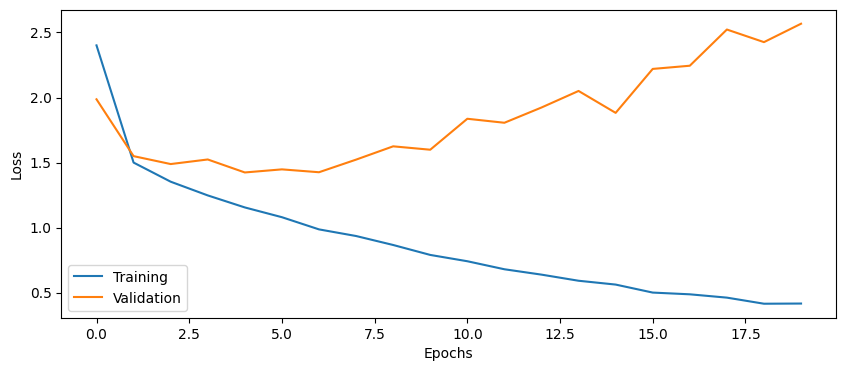

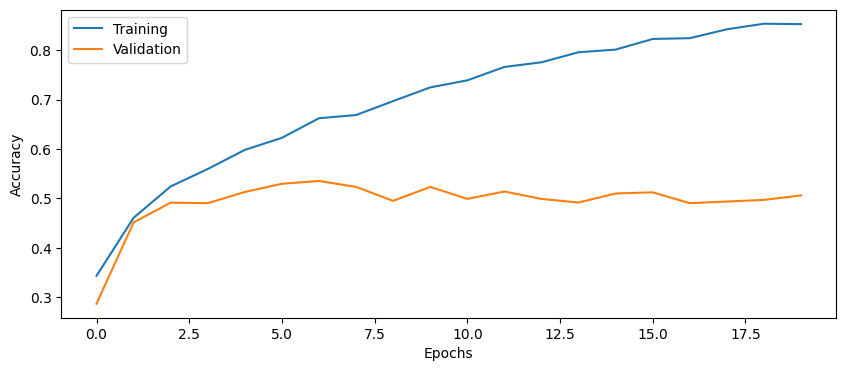

In [17]:
from utilities import plot_results
# Plot the history from the training run
plot_results(history1)

##  4.3 Improving model performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%)? 

#### **<span style="color:red">Questions</span>**
13. How big is the difference between training and test accuracy?

14. For the DNN elaboration we used a batch size of 10.000, why do we need to use a smaller batch size in this elaboration?

#### **<span style="color:green">Answers</span>**
13. - training accuracy: 0.85
    - test accuracy: 0.50
14. A smaller batch size is used for CNN elaboration because of higher memory requirements per sample, better generalization, and optimal GPU utilization. Unlike DNNs, which can handle large batches efficiently, CNNs require careful memory management.


Experiment with several model configurations in the following sections. 

### 2 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes)

Epoch 1/20
350/350 [==============================] - 2s 5ms/step - loss: 1.7751 - accuracy: 0.3690 - val_loss: 2.2453 - val_accuracy: 0.2497
Epoch 2/20
350/350 [==============================] - 1s 4ms/step - loss: 1.4476 - accuracy: 0.4796 - val_loss: 1.5976 - val_accuracy: 0.4433
Epoch 3/20
350/350 [==============================] - 1s 4ms/step - loss: 1.3000 - accuracy: 0.5359 - val_loss: 1.2737 - val_accuracy: 0.5363
Epoch 4/20
350/350 [==============================] - 2s 4ms/step - loss: 1.1605 - accuracy: 0.5867 - val_loss: 1.2628 - val_accuracy: 0.5543
Epoch 5/20
350/350 [==============================] - 1s 4ms/step - loss: 1.0677 - accuracy: 0.6169 - val_loss: 1.3754 - val_accuracy: 0.5350
Epoch 6/20
350/350 [==============================] - 1s 4ms/step - loss: 0.9520 - accuracy: 0.6583 - val_loss: 1.3545 - val_accuracy: 0.5437
Epoch 7/20
350/350 [==============================] - 1s 4ms/step - loss: 0.8495 - accuracy: 0.7039 - val_loss: 1.4783 - val_accuracy: 0.5393
Epoch 

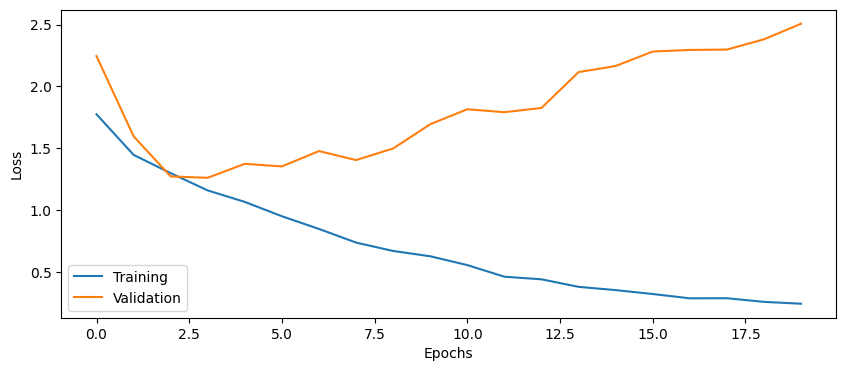

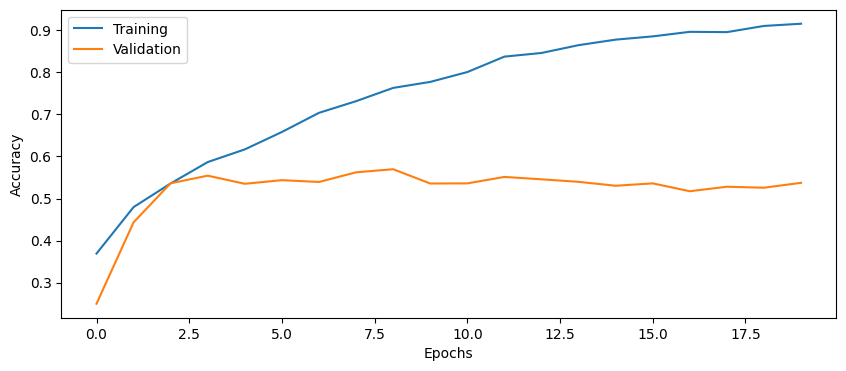

In [18]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = Xtrain.shape[1:]
learning_rate = 0.01

# Build model
model1 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate,n_filters=16,
                  n_dense_layers=1, n_nodes=50)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, Yval))

# Evaluate model on test data
score = model1.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history1)

### 4 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes)

Epoch 1/20
350/350 [==============================] - 3s 6ms/step - loss: 1.9431 - accuracy: 0.2951 - val_loss: 2.6851 - val_accuracy: 0.2170
Epoch 2/20
350/350 [==============================] - 2s 6ms/step - loss: 1.6994 - accuracy: 0.3743 - val_loss: 2.4206 - val_accuracy: 0.2390
Epoch 3/20
350/350 [==============================] - 2s 6ms/step - loss: 1.5776 - accuracy: 0.4253 - val_loss: 2.2714 - val_accuracy: 0.2817
Epoch 4/20
350/350 [==============================] - 2s 6ms/step - loss: 1.4927 - accuracy: 0.4517 - val_loss: 1.6599 - val_accuracy: 0.4050
Epoch 5/20
350/350 [==============================] - 2s 6ms/step - loss: 1.4418 - accuracy: 0.4763 - val_loss: 1.4336 - val_accuracy: 0.4707
Epoch 6/20
350/350 [==============================] - 2s 6ms/step - loss: 1.3989 - accuracy: 0.4857 - val_loss: 1.5643 - val_accuracy: 0.4557
Epoch 7/20
350/350 [==============================] - 2s 6ms/step - loss: 1.3818 - accuracy: 0.4953 - val_loss: 1.4075 - val_accuracy: 0.4973
Epoch 

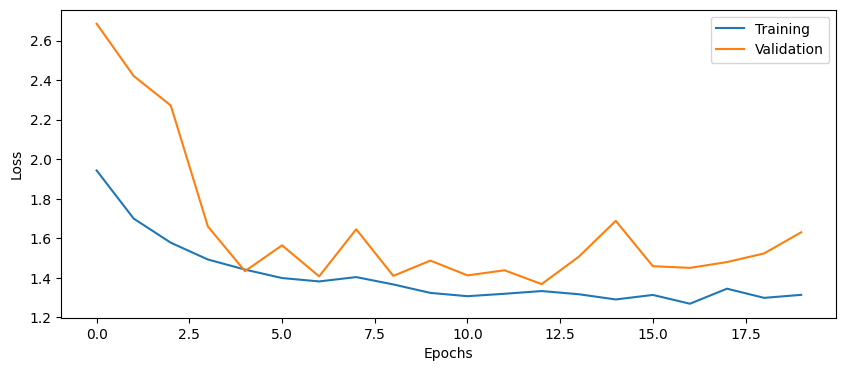

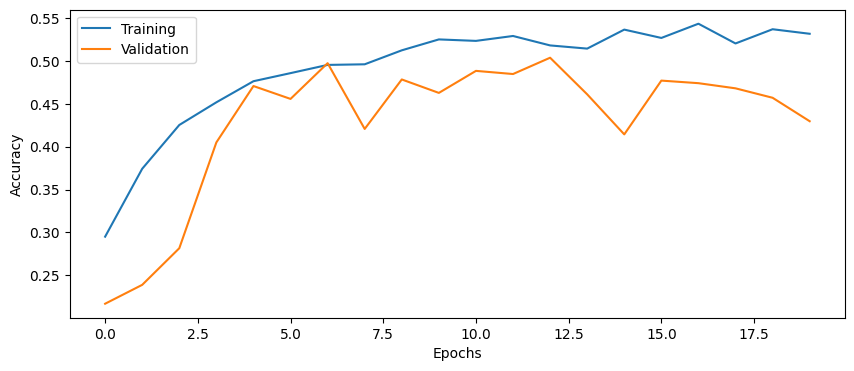

In [19]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = Xtrain.shape[1:]
learning_rate = 0.01

# Build model
model2 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate,
                   n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50)

history2 = model2.fit(Xtrain, Ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, Yval))

# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history2)

In [20]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_8 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

## 4.4 Plot the CNN architecture and understand the internal model dimensions

To understand your network better, print the architecture using `model.summary()`

#### **<span style="color:red">Questions</span>**

15. How many trainable parameters does your network have? Which part of the network contains most of the parameters?
    
16. What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
17. Is the batch size always the first dimension of each 4D tensor? Check the [documentation](https://keras.io/layers/convolutional/) for Conv2D.
18. If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
19. Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
20. How does MaxPooling help in reducing the number of parameters to train?

#### **<span style="color:green">Answers</span>**
15. Our network(model2) has 124180 trainable parameters. The Conv2D layers contain most of the parameters.\
16. - Input: A 4D tensor of shape (batch_size, height, width, channels).\
    - Output: Another 4D tensor of shape (batch_size, new_height, new_width, filters).\
17. In Keras, the batch size is always the first dimension in a 4D tensor.\
18. The number of output channels is equal to the number of filters. Since we apply 128 filters to an input with 32 channels, the output will have 128 channels.\
19. The number of parameters in a Conv2D layer is given by: $$(filter\_height \cdot filter\_width \cdot input\_channels \cdot output\_filters) + output\_filters$$
    This formula includes the weights for each filter (filter size × input channels) and the bias terms for each filter (1 bias per filter).\
20. MaxPooling reduces the spatial dimensions (height & width) of the feature maps without adding new parameters.\

##  4.5 Dropout regularization

Add dropout regularization between each intermediate dense layer, with dropout probability 50%.

#### **<span style="color:red">Questions</span>**

21. How much did the test accuracy improve with dropout, compared to without dropout?

22. What other types of regularization can be applied? How can you add `L2 regularization` for the convolutional layers?
 
#### **<span style="color:green">Answers</span>**
21. Test accuracy with dropout:0.459.\
    Test accuracy without dropout:0.439.
    Improvement: around 2%.
22. Other types of regularization:
-L1 Regularization (Lasso): Adds absolute weight penalties.\
-Early Stopping: Stops training when validation loss starts increasing.\
-Data Augmentation: Introduces variations (rotation, flipping, cropping) to improve generalization.



### 4 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes) with dropout

Epoch 1/20
350/350 [==============================] - 3s 6ms/step - loss: 2.0287 - accuracy: 0.2570 - val_loss: 2.3098 - val_accuracy: 0.2027
Epoch 2/20
350/350 [==============================] - 2s 6ms/step - loss: 1.7496 - accuracy: 0.3551 - val_loss: 1.7466 - val_accuracy: 0.3180
Epoch 3/20
350/350 [==============================] - 2s 6ms/step - loss: 1.6518 - accuracy: 0.3867 - val_loss: 1.7617 - val_accuracy: 0.3553
Epoch 4/20
350/350 [==============================] - 2s 6ms/step - loss: 1.6115 - accuracy: 0.4110 - val_loss: 1.7075 - val_accuracy: 0.3540
Epoch 5/20
350/350 [==============================] - 2s 6ms/step - loss: 1.5606 - accuracy: 0.4271 - val_loss: 1.4391 - val_accuracy: 0.4543
Epoch 6/20
350/350 [==============================] - 2s 6ms/step - loss: 1.5045 - accuracy: 0.4427 - val_loss: 1.5056 - val_accuracy: 0.4310
Epoch 7/20
350/350 [==============================] - 2s 6ms/step - loss: 1.4719 - accuracy: 0.4566 - val_loss: 1.4250 - val_accuracy: 0.4597
Epoch 

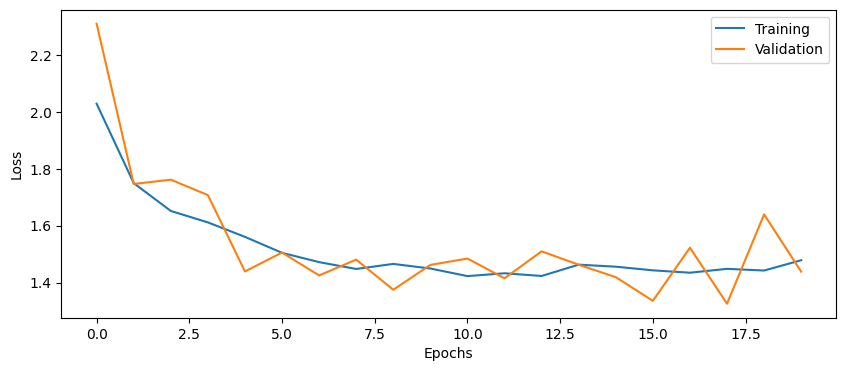

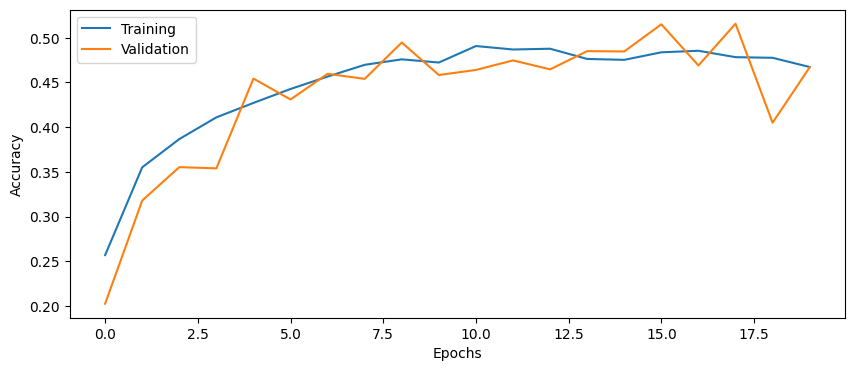

In [21]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = Xtrain.shape[1:]
learning_rate = 0.01

# Build model
model3 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate,
                   n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True)

history3 = model3.fit(Xtrain, Ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, Yval))

# Evaluate model on test data
score = model3.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

plot_results(history3)

##  4.6 Tweaking model performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

#### **<span style="color:red">Questions</span>**

23. How high test accuracy can you obtain? What is your best configuration?

#### **<span style="color:green">Answers</span>**
Test accuracy : 0.6725\
best configuration:
-batch_size=64\
-epochs=50\
-learning rate=0.001\
optimizer='adam'\
-n_conv_layers=4\
-n_filters=128\
-n_dense_layers=1\
-n_nodes=256\
-use_dropout=True


## *Your best config*

Epoch 1/50
110/110 [==============================] - 18s 153ms/step - loss: 2.2447 - accuracy: 0.3013 - val_loss: 2.9134 - val_accuracy: 0.0997
Epoch 2/50
110/110 [==============================] - 17s 152ms/step - loss: 1.7593 - accuracy: 0.4001 - val_loss: 4.0448 - val_accuracy: 0.0967
Epoch 3/50
110/110 [==============================] - 18s 166ms/step - loss: 1.4381 - accuracy: 0.4919 - val_loss: 4.8701 - val_accuracy: 0.1377
Epoch 4/50
110/110 [==============================] - 18s 166ms/step - loss: 1.2325 - accuracy: 0.5653 - val_loss: 3.2382 - val_accuracy: 0.2277
Epoch 5/50
110/110 [==============================] - 18s 165ms/step - loss: 1.0185 - accuracy: 0.6403 - val_loss: 2.2635 - val_accuracy: 0.3503
Epoch 6/50
110/110 [==============================] - 19s 170ms/step - loss: 0.8085 - accuracy: 0.7170 - val_loss: 1.5817 - val_accuracy: 0.4947
Epoch 7/50
110/110 [==============================] - 19s 173ms/step - loss: 0.6238 - accuracy: 0.7757 - val_loss: 1.1018 - val_ac

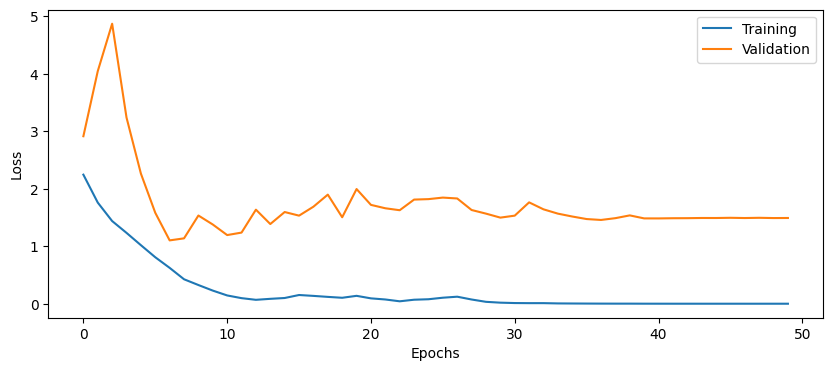

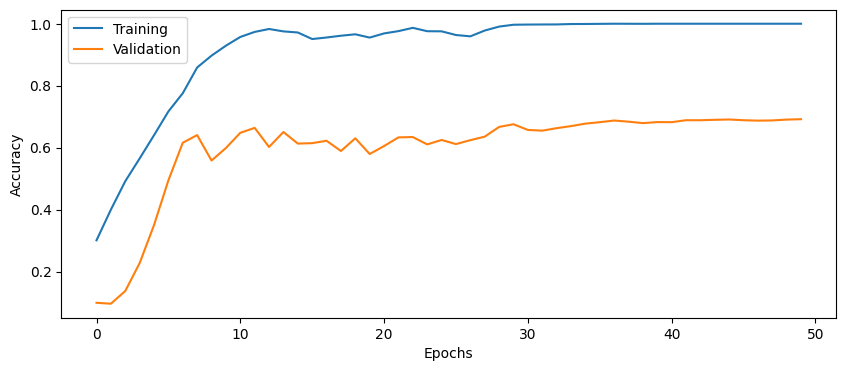

In [49]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
#batch_size = 20
#epochs = 20
#input_shape = Xtrain.shape[1:]
#learning_rate = 0.01
# Setup some training parameters
batch_size = 64
epochs = 50
input_shape = Xtrain.shape[1:]
learning_rate = 0.001

#model3 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate,
                   #n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True)


#
# Build and train model. Here experiment with several model architecture configurations to obtain the best performance.
model4 = build_CNN(input_shape = input_shape, loss = CCE(), optimizer='adam', learning_rate=learning_rate,
                   n_conv_layers=4, n_filters=128, n_dense_layers=1, n_nodes=256, use_dropout=True)

history4 =model4.fit(Xtrain, Ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, Yval))

# Evaluate model on test data
score = model4.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history4)

# Part 5: Model generalization

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

#### **<span style="color:red">Questions</span>**

24. What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

#### **<span style="color:green">Answers</span>**
0.2615,the model has only seen images in their normal orientation during training. The distribution of rotated images is different from the training data, causing the model to fail in correctly recognizing them.

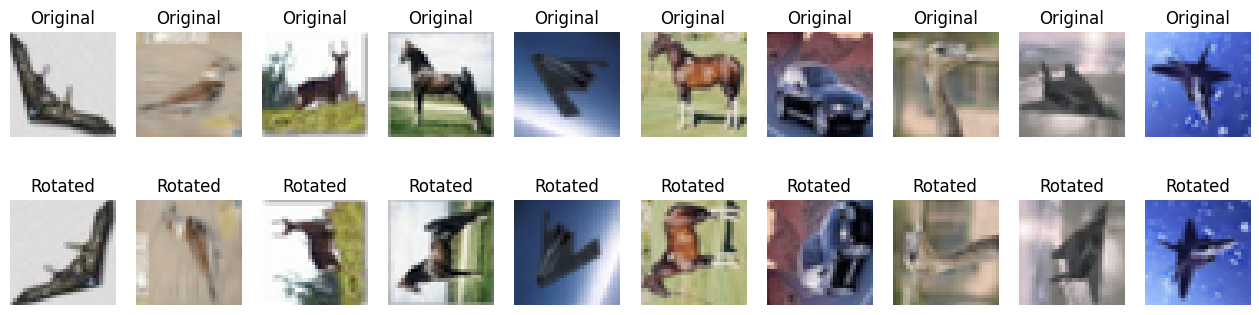

In [50]:
from utilities import myrotate
# Visualize some rotated images
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [51]:
# Evaluate the trained model on rotated test set
score = model4.evaluate(Xtest_rotated, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 5.3128
Test accuracy: 0.2615


##  5.1 Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`. In particular, we will use the `flow()` functionality (see the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for more details).

Make sure to use different subsets for training and validation when you calling `flow()` on the training data generator in `model.fit()`, otherwise you will validate on the same data. 

In [52]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own

# re-load the CIFAR10 train and test data
(X, Y), (Xtest, Ytest) = cifar10.load_data()

# Reduce the number of images for training/validation and testing to 10000 and 2000 respectively, 
# to reduce processing time for this elaboration. 
X = X[0:10000]
Y = Y[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

# Change data type and rescale range
X = X.astype('float32')
Xtest = Xtest.astype('float32')

X = X / 127.5 - 1
Xtest = Xtest / 127.5 - 1


# Convert labels to hot encoding
Y = to_categorical(Y, 10) #label to a vector[0000000000]
Ytest = to_categorical(Ytest, 10)

print("Training/validation images have size {} and labels have size {} ".format(X.shape, Y.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

Training/validation images have size (10000, 32, 32, 3) and labels have size (10000, 10) 
Test images have size (2000, 32, 32, 3) and labels have size (2000, 10) 
 


In [72]:
from tf_keras.preprocessing.image import ImageDataGenerator

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Use a rotation range of 30 degrees, horizontal and vertical flipping
# Set up image data generator
image_dataset = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.3  #spilt the dataset into training and validation data
)
#validation ImageDataGenerator
val_datagen= ImageDataGenerator(
   validation_split=0.3
)

train_flow=image_dataset.flow(X,Y,subset="training",batch_size=20,seed=42,shuffle=True)
validation_flow=val_datagen.flow(X,Y,subset="validation",seed=42,shuffle=False)

# ============================================


#### **<span style="color:red">Questions</span>**

25. How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

#### **<span style="color:green">Answers</span>**
Use `flow_from_directory`method of `ImageDataGenerator` to load datasets in batches directly from disk.

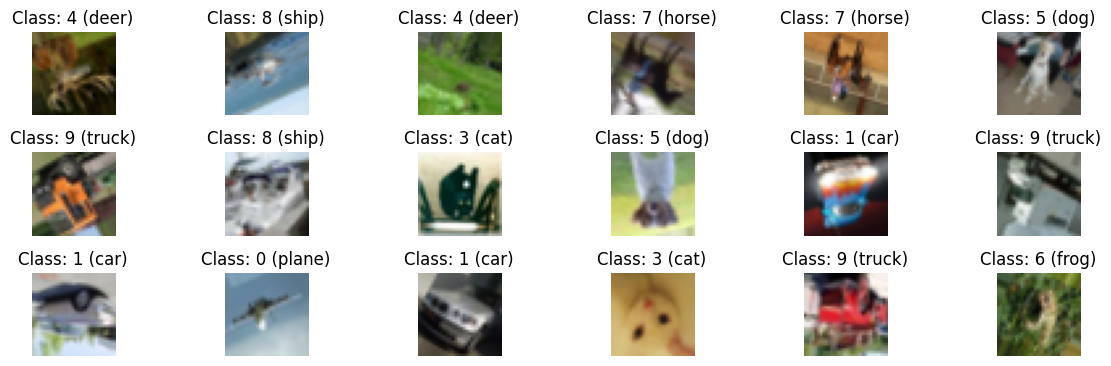

In [73]:
# Plot some augmented images

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = train_flow.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## 5.2 Train the CNN with images from the generator

Check the documentation for the [`model.fit`](https://keras.io/api/models/model_training_apis/#fit-method) method how to use it with a generator instead of a fix dataset (numpy arrays).

To make the comparison fair to training without augmentation

- `steps_per_epoch` should be set to: `len(Xtrain)/batch_size`
- `validation_steps` should be set to: `len(Xval)/batch_size`
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

#### **<span style="color:red">Questions</span>**

26. How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

27. What other types of image augmentation can be applied, compared to what we use here?

#### **<span style="color:green">Answers</span>**
26.- The  training accuracy   increases gradually  and  reaching around 71.91% by epoch 31. This is primarily because data augmentation artificially increases the diversity of the training data compared to without augmentation, making the model more robust to variations but also requiring more epochs to learn useful patterns effectively.The number of epochs should be increased to perform more training.
27.-Color transformations: Brightness,Contrast Adjustment.\
-Geometric Transformations: Scaling,Translation.\
-Noise Injection:Blur,Gaussian Noise.

In [74]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup training parameters
batch_size = 64
epochs = 50
input_shape = X.shape[1:]
learning_rate = 0.001



# Build model (your best config)
model6 = build_CNN(input_shape = input_shape,
                   loss = CCE(),
                   optimizer='adam',
                   learning_rate=learning_rate,
                   n_conv_layers=4,
                   n_filters=128,
                   n_dense_layers=1,
                   n_nodes=256,
                   use_dropout=True)

# Set up training and validation dataset flows from image_dataset
# flow() for training data
train_flow = image_dataset.flow(X,Y,subset="training",batch_size=64,seed=42,shuffle=True)

# flow() for validation data
val_flow = val_datagen.flow(X,Y,subset="validation",seed=42,shuffle=False)

#calculate

steps_per_epoch=int((0.7*len(X))/batch_size)
validation_steps=int((0.3*len(X))/batch_size)


# Train the model using on the fly augmentation
history6 = model6.fit(train_flow,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_flow,
    validation_steps=validation_steps)

# ============================================

Epoch 1/50
109/109 [==============================] - 17s 148ms/step - loss: 2.3180 - accuracy: 0.2561 - val_loss: 3.2535 - val_accuracy: 0.1094
Epoch 2/50
109/109 [==============================] - 16s 145ms/step - loss: 1.9590 - accuracy: 0.3178 - val_loss: 2.1556 - val_accuracy: 0.1569
Epoch 3/50
109/109 [==============================] - 16s 147ms/step - loss: 1.7691 - accuracy: 0.3638 - val_loss: 3.2897 - val_accuracy: 0.1495
Epoch 4/50
109/109 [==============================] - 16s 148ms/step - loss: 1.6630 - accuracy: 0.3956 - val_loss: 4.0266 - val_accuracy: 0.1963
Epoch 5/50
109/109 [==============================] - 16s 151ms/step - loss: 1.5512 - accuracy: 0.4292 - val_loss: 2.9452 - val_accuracy: 0.2690
Epoch 6/50
109/109 [==============================] - 18s 161ms/step - loss: 1.4789 - accuracy: 0.4498 - val_loss: 2.2045 - val_accuracy: 0.3689
Epoch 7/50
109/109 [==============================] - 17s 160ms/step - loss: 1.4089 - accuracy: 0.4875 - val_loss: 1.6008 - val_ac

In [75]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.1892
Test accuracy: 0.6380
Test loss: 3.1262
Test accuracy: 0.2945


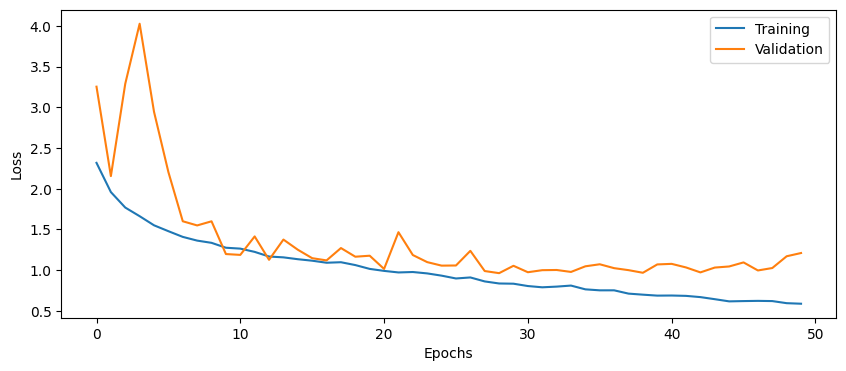

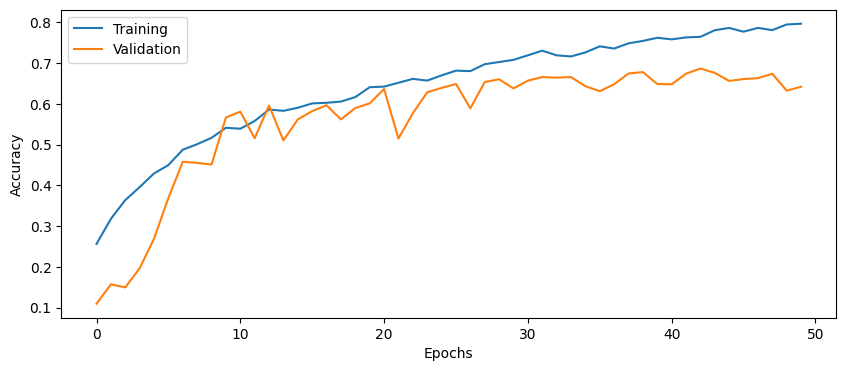

In [76]:
# Plot the history from the training run
plot_results(history6)

## Plot misclassified images

Lets plot some images where the CNN performed badly.

In [77]:
# Find misclassified images
y_pred=model6.predict(Xtest, verbose=0) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

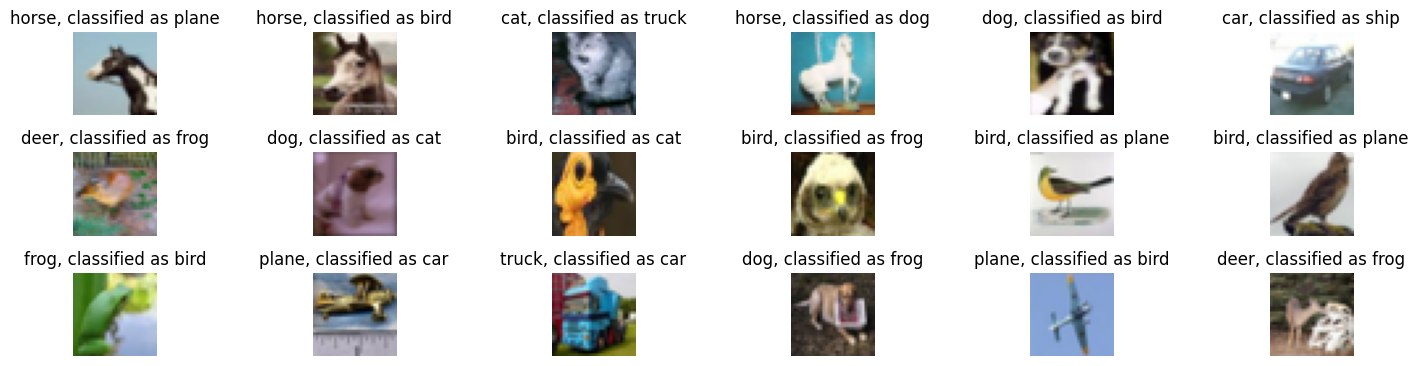

In [78]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  5.3 Testing on another size

#### **<span style="color:red">Questions</span>**

28. This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

29. Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

#### **<span style="color:green">Answers</span>**
28. No. It has fully connected layers which expect a fixed-size input.So if we change the size of input images, it will not match.
29. Yes.By not using fully connected layers and using fully convolutional networks instead.

# Part 6: Carbon footprint

In this next section we will evaluate the carbon footprint of training our CNN model. In particular we will look at the effect of training hyper parameters of carbon footprint. You can read more about this topic [here](https://arxiv.org/abs/2007.03051) or [here](https://research.google/blog/good-news-about-the-carbon-footprint-of-machine-learning-training/). 

In this lab we will use the `carbontracker` library that easily integrates with any model training routine. See the example in the [documentation](https://github.com/lfwa/carbontracker?tab=readme-ov-file) on how to use the carbon tracker.

#### **<span style="color:red">Questions</span>**

28. Keeping the model architecture fixed, which training parameter impacts the carbon footprint? 
    
29. The choice of batch size can dramatically impact carbon foot print: why is this the case?
    
30. Assume that you have a model with 100 million parameters running in the backend of a service with 5 million users. How can the carbon footprint of using this model be reduced?

#### **<span style="color:green">Answers</span>**
28.Learning rate:A high learning rate might lead to faster convergence,which reduces training time and reduce carbon footprint.\
Optimizer:Different optimizers (e.g., Adam, SGD, etc.) affect convergence speeds and computational overhead.\
epochs: The more epochs you run, the longer the training process, the more carbon footprint costs.\
29.The choice of batch size impacts the carbon footprint  through:\
(1)Computational efficiency: Larger batches reduce the number of iterations, saving energy.\
(2)Hardware utilization: Larger batches better utilize parallel processing capabilities, reducing energy waste.\
(3)Energy consumption: Using larger batches,while each iteration consumes more energy due to the larger data size, the reduced number of iterations often results in lower overall energy consumption.\
(4)Convergence dynamics: Larger batches may require fewer iterations to converge, further reducing energy use.\
30. Model optimization:
(1)Pruning:Remove redundant or less important weights or neurons from the model.Sparse models require fewer computations and less memory.\
(2)Quantization::Reduce the precision of model weights (for example, from 32-bit floating point to 8-bit integers).\
(3)Knowledge Distillation: Train a smaller, more efficient "student" model to mimic the behavior of the larger "teacher" model.\
Infrastructure Optimization:\
(1) Hardware Efficiency:Use energy-efficient hardware, such as GPUs or TPUs optimized for inference\
(2)Server Utilization:Optimize server utilization by batching requests and running models in parallel.\




In [80]:
from carbontracker.tracker import CarbonTracker

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Setup training parameters
batch_size = 64
epochs = 50
input_shape = X.shape[1:]
learning_rate=0.001
# Build model (your best config)
model7 = build_CNN(input_shape=input_shape,
                   loss=CCE(),
                   optimizer='adam',
                   learning_rate=learning_rate,
                   n_conv_layers=4,
                   n_filters=128,
                   n_dense_layers=1,
                   n_nodes=256,
                   use_dropout=True)

# Create a CarbonTracker object
tracker = CarbonTracker(epochs=epochs)

# start carbon tracking
tracker.epoch_start()

# fit model
model.fit(train_flow,
    validation_data=val_flow,
    epochs=epochs,
    steps_per_epoch=int((0.7 * len(X)) / batch_size),
    validation_steps=int((0.3 * len(X)) / batch_size))

tracker.epoch_end()

# ============================================


CarbonTracker: The following components were found: GPU with device(s) NVIDIA GeForce RTX 4060 Laptop GPU.
Epoch 1/50
CarbonTracker: WARNING - ElectricityMaps API key not set. Will default to average carbon intensity.
CarbonTracker: WARNING - Failed to retrieve carbon intensity: Defaulting to average carbon intensity 40.694878 gCO2/kWh.
109/109 [==============================] - 3s 27ms/step - loss: 1.4770 - accuracy: 0.4601 - val_loss: 1.4678 - val_accuracy: 0.4633
Epoch 2/50
109/109 [==============================] - 2s 23ms/step - loss: 1.4470 - accuracy: 0.4753 - val_loss: 1.4300 - val_accuracy: 0.4721
Epoch 3/50
109/109 [==============================] - 2s 22ms/step - loss: 1.4438 - accuracy: 0.4836 - val_loss: 1.4484 - val_accuracy: 0.4545
Epoch 4/50
109/109 [==============================] - 2s 22ms/step - loss: 1.4286 - accuracy: 0.4817 - val_loss: 1.3839 - val_accuracy: 0.4939
Epoch 5/50
109/109 [==============================] - 2s 22ms/step - loss: 1.4326 - accuracy: 0.4807

# Part 7: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

#### **<span style="color:red">Questions</span>**

31. How many convolutional layers does ResNet50 have? 

32. How many trainable parameters does the ResNet50 network have? 

33. What is the size of the images that ResNet50 expects as input?

34. Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

35. What do you expect the carbon footprint of using pre-trained networks to be compared to training a model from scratch?

#### **<span style="color:green">Answers</span>**
31. 50 convolutional layers.
32. trainable parameter :25583592.
33. (224,224)
34. (1)High computational cost: Calculating and storing second derivatives (Hessian matrix) is significantly expensive for large networks.(2)Memory usage:The Hessian matrix is super large, making it impractical for models with millions of parameters.(3)Algorithms based on the gradient (first derivative) are sufficient for most deep learning applications and are computationally efficient.
35. Using Pre-Trained Networks: It requires far less computational power compared to training from scratch because model has already been trained on a large dataset, what we need to do are tasks like fine-tuning or inference.So it has a significantly lower carbon footprint.


After loading the pre-trained CNN, apply it to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this elaboration.

Some useful functions:
- `load_img` and `img_to_array` in [tf_keras.utils](https://www.tensorflow.org/api_docs/python/tf/keras/utils).
- `ResNet50` in [tf_keras.applications.ResNet50](tf.keras.applications.ResNet50).
- `preprocess_input` in [tf_keras.applications.resnet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input).
- `decode_predictions` in [tf_keras.applications.resnet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/decode_predictions).
- `expand_dims` in [numpy](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html).

See [keras applications](https://keras.io/api/applications/) and the keras [resnet50-function](https://keras.io/api/applications/resnet/#resnet50-function) for more details.

In [61]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import the necessary libraries and functions 
from tf_keras.applications import ResNet50
from tf_keras.utils import load_img, img_to_array
from tf_keras.applications.resnet import preprocess_input,decode_predictions

# load the pre-trained ResNet50 model
resnet50 = ResNet50(weights="imagenet")

# print the model summary
resnet50.summary()

# load the image and preprocess it
#image =
image_paths = [
    'image/image1.jpg',
    'image/image2.jpg',
    'image/image3.jpg',
    'image/image4.jpg',
    'image/image5.jpg'
]

for image_path in image_paths:

    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)  # numpy
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    preds = resnet50.predict(img_array)


    label = decode_predictions(preds, top=1)[0][0]

# print the predicted label
    print(f"Prediction for {image_path}: {label[1]} with probability {label[2]:.2f}")

# ============================================

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

# Part 8 (OPTIONAL)

Set up `Ray Tune` and run automatic hyper parameter optimization for the CNN model as we have done in the DNN lab. Remember that you have to define the `train_CNN` function, specify the hyper parameter search space and the number of samples to evaluate, among other.